intro

In [1]:
# Importo los módulos y las bibliotecas que usaré en este bloque de código y en los siguientes
import pandas as pd  
import sqlalchemy  
import getpass  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import squarify


# Función para crear una conexión con la base de datos
def create_database_connection(user, password, host, database_name):

    try:
        # Creo un motor de conexión con SQLAlchemy utilizando pymysql como driver
        engine = sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database_name}")

        # Establezco una conexión con la base de datos
        connection = engine.connect()

        print("\nConexión a la base de datos establecida con éxito.\n")
        return engine, connection 
    except Exception as e:
        # Capturo y mostro errores en caso de que falle la conexión
        print("\nError en la conexión a la base de datos:\n", e)

        return None, None  # Si falla, retorno None para ambos.

# Función para obtener los nombres de las tablas disponibles en la base de datos
def get_table_names(engine):

    # Crear un inspector para examinar la base de datos
    inspector = sqlalchemy.inspect(engine)

    # Obtener una lista de nombres de tablas
    table_names = inspector.get_table_names()

    if table_names:
        # Si se encuentran tablas, mostrarlas en pantalla
        print("Tablas encontradas en la base de datos:", table_names)

    else:
        # Si no hay tablas, informo al usuario y termino el programa
        print("Ninguna tabla encontrada en la base de datos.\n\nSalida del programa")

    return table_names

# Función para cargar datos de las tablas en DataFrames de pandas
def load_tables_into_dataframes(connection, table_names):

    # Itero sobre cada tabla en la lista de nombres
    for table_name in table_names:

        # Creo una consulta SQL para seleccionar todos los datos de la tabla
        query = f"SELECT * FROM {table_name}"

        # Cargo los datos de la tabla en un DataFrame global con un nombre basado en el nombre de la tabla
        globals()[f"df_{table_name}"] = pd.read_sql(query, connection)

        print(f"\nDatos cargados para la tabla: {table_name}")

# Función para mostrar los datos y la estructura de los DataFrames
def display_dataframes(table_names):

    print("\nContenido de las tablas:")
    # Itero sobre cada nombre de tabla
    for table_name in table_names:

        # Construyo el nombre del DataFrame asociado a la tabla
        df_name = f"df_{table_name}"

        # Obtengo el DataFrame global usando su nombre
        df = globals()[df_name]

        # Muestro información sobre la tabla y ejemplos de datos (primeras y últimas filas)
        print(f"\nTabla: {table_name}")
        print(df.info(), "\n")  
        print(df.head(3), "\n")  
        print(df.tail(3), "\n") 

# Pido al usuario las credenciales para conectarse a la base de datos
user = input("Introduce el nombre de usuario para la base de datos (ej: root): ")
password = getpass.getpass("Introduce la contraseña para la base de datos (ej: ****): ")
host = input("Introduce el host de la base de datos (ej: localhost): ")
database_name = input("Introduce el nombre de la base de datos (ej: sprint_4_v2): ")

# Creo la conexión con la base de datos y cargar los datos
engine, connection = create_database_connection(user, password, host, database_name)
# Si la conexión fue exitosa obtengo los nombres de las tablas
if connection: 
    table_names = get_table_names(engine)  
    
    # Si se encontraron tablas cargolos datos en DataFrames y los muestro
    if table_names:  
        load_tables_into_dataframes(connection, table_names) 
        display_dataframes(table_names)  



Conexión a la base de datos establecida con éxito.

Tablas encontradas en la base de datos: ['companies', 'credit_cards', 'products', 'transactions', 'users']

Datos cargados para la tabla: companies

Datos cargados para la tabla: credit_cards

Datos cargados para la tabla: products

Datos cargados para la tabla: transactions

Datos cargados para la tabla: users

Contenido de las tablas:

Tabla: companies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None 

  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 8

1.1 Visualización de una variable numérica


<Axes: xlabel='edad', ylabel='count'>

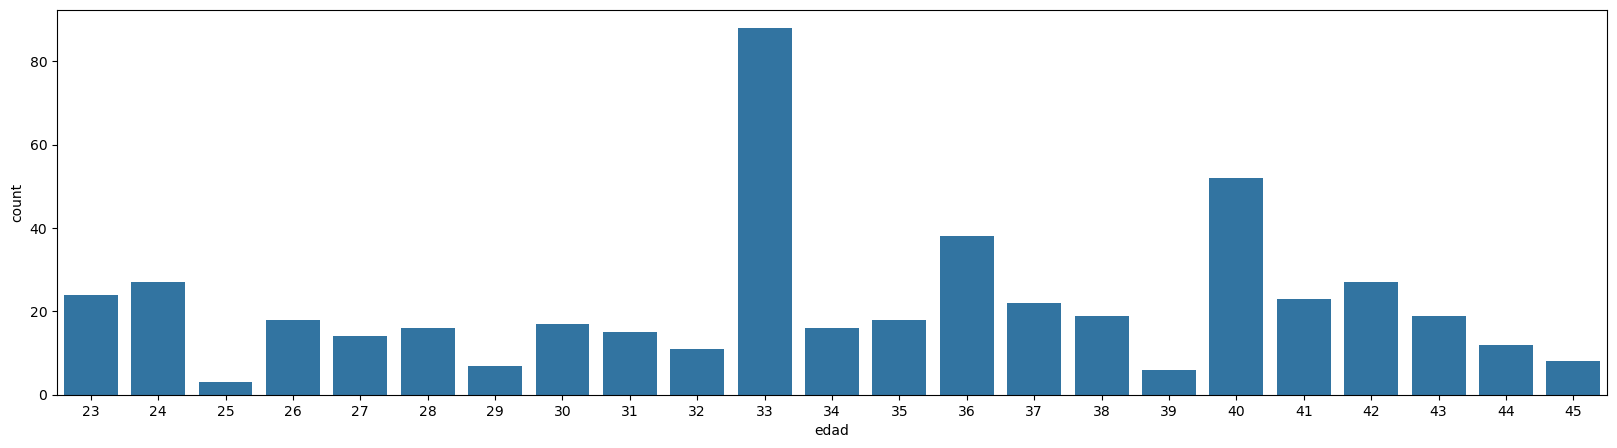

In [ ]:
# Convierto la columna 'birth_date' en el DataFrame 'df_users' al formato de fecha, especificando el formato original de las fechas
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], format='%b %d, %Y')

# Calculo la edad en años para cada usuario con diferencia entre la fecha actual y su fecha de nacimiento
df_users['edad'] = df_users['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Filtro las transacciones aprobadas (donde 'declined' es igual a 0) y las almanezco en un nuevo DataFrame
df_transactions_x_1_1 = df_transactions[df_transactions['declined'] == 0]

# Combino los DataFrames 'df_users' y 'df_transactions_x_1_2' usando 'id' de 'df_users' y 'user_id' de 'df_transactions_x_1_1' como claves comunes
df_user_tx_1 = pd.merge(df_users, df_transactions_x_1_1, left_on="id", right_on="user_id")

# Creo una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Creo un gráfico de barras utilizando 'sns.countplot', mostrando la cantidad de usuarios para cada edad
sns.countplot(data=df_user_tx_1, x='edad')


Para el ejercicio 1.1 elijo representar como variable numérica el conteo de las t
ransacciones aprobadas dividido por edad.

Primero calculo la edad a través de la columna de la fecha de nacimiento, convierto la columna al formato de fecha y luego encuentro el número de años restando el valor a la fecha actual.

Luego filtro las transacciones aprobadas tomando solo aquellas con declined=0.

A continuación, uno las tablas de usuarios y transacciones (filtrada) para tener la edad para cada transacción aprobada.

Finalmente, defino el tamaño del gráfico y lo muestro con countplot como un gráfico de barras.

Del gráfico se observa que la edad con más transacciones aprobadas es 33 años, con casi 100 transacciones; seguido de los usuarios de 40 años, con casi 60 transacciones, y los usuarios de 36 años, con casi 40 transacciones.

Analizando más a fondo el gráfico, no se logra reconocer un patrón preciso. Por ejemplo, los usuarios de 33 años que tienen casi 100 órdenes no tienen una correlación con los usuarios de 32 o 34 años, quienes ambos luchan por llegar a un conteo de 20 órdenes.

Este gráfico nos sugiere que por el momento el rango de edad de los clientes es amplio y bastante uniforme, exceptuando las excepciones.

Probablemente, con el tiempo y el aumento de los pedidos, será fácil confirmar esta uniformidad, o bien, surgirá más claramente una tendencia hacia un rango de edad más rentable, que podría ser, por ejemplo, el grupo de clientes de 30 a 40 años.


1.2 Visualización de dos variables numéricas

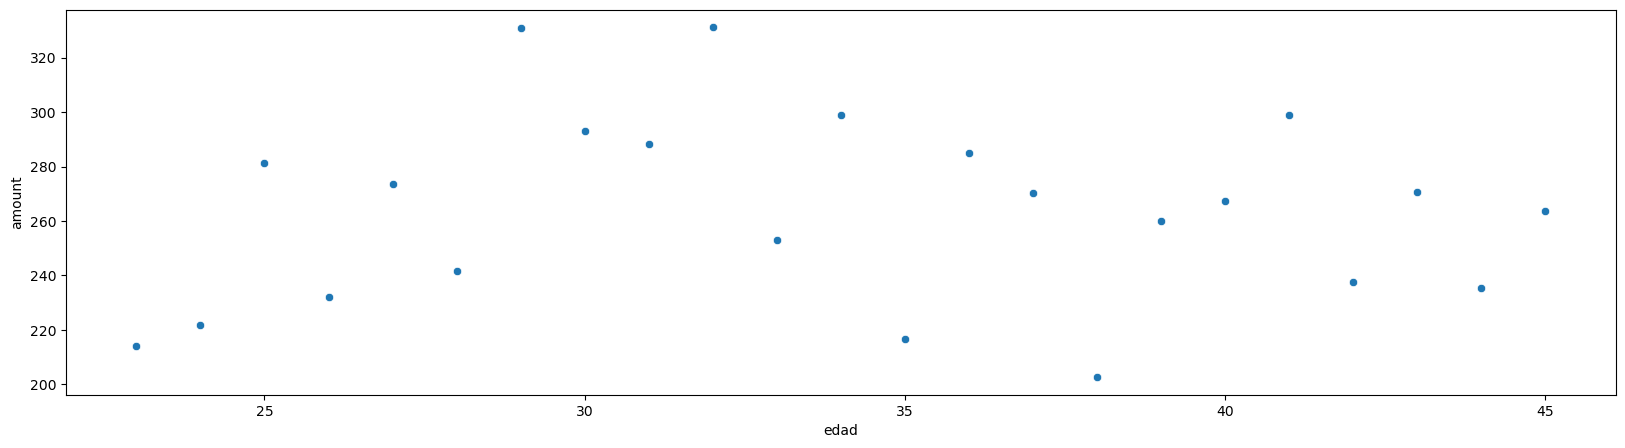

In [ ]:
# Convierto la columna 'amount' en el DataFrame 'df_transactions' al tipo de dato float
df_transactions['amount'] = df_transactions['amount'].astype(float)

# Filtro las transacciones aprobadas (donde 'declined' es igual a 0) y las almanezco en un nuevo DataFrame
df_transactions_x_1_2 = df_transactions[df_transactions['declined'] == 0]

# Combino los DataFrames 'df_users' y 'df_transactions_x_1_2' usando 'id' de 'df_users' y 'user_id' de 'df_transactions_x_1_2' como claves comunes
df_user_tx_2 = pd.merge(df_users, df_transactions_x_1_2, left_on="id", right_on="user_id")

# Agrupo los datos por edad ('edad') y calculo la media de los montos ('amount') por grupo
compra_by_age = df_user_tx_2.groupby('edad')["amount"].mean().reset_index()

# Creo una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Creo un diagrama de dispersión (scatter plot) que muestre la relación entre la edad ('edad') y el monto promedio de compra ('amount')
sns.scatterplot(data=compra_by_age, x="edad", y="amount")

# Muestro el gráfico
plt.show()



Para el ejercicio 1.2 elijo representar las medias de los importes de las transacciones agrupadas por edad.

Primero convierto al tipo float la columna amount de la tabla transactions para poder usarla como número.

Luego filtro de la misma tabla solo las transacciones aprobadas donde declined=0 y la uno con la tabla users.

A continuación, agrupo los valores por edad y calculo la media de los amounts.

Finalmente, defino el tamaño del gráfico y lo muestro como un diagrama de dispersión con scatterplot.

Del gráfico se desprende que las medias de amount más altas son las de los usuarios alrededor de los 30 años, con picos de media más alta para los 29 y 32 años.

Por debajo de los 25 años, en cambio, tenemos el grupo con la media más baja.

Por lo demás, excluyendo las excepciones de los usuarios de 35 y 38 años con una media muy baja que merece ser investigada, el resto de las medias es bastante uniforme, rondando entre los 240 y 300 euros.

Este gráfico sería una útil base de partida en caso de que se quisieran crear estrategias de marketing basadas en la edad de los clientes. En un análisis podríamos implementarlo, por ejemplo, con el gráfico anterior para saber de cuántas transacciones ha surgido esta media, cuántos clientes activos hay por cada edad, cuáles han sido los productos más comprados o menos comprados por los usuarios según su edad, y cuáles son los períodos más rentables, siempre agrupando por edad.

1.3 Visualización de una variable categorica

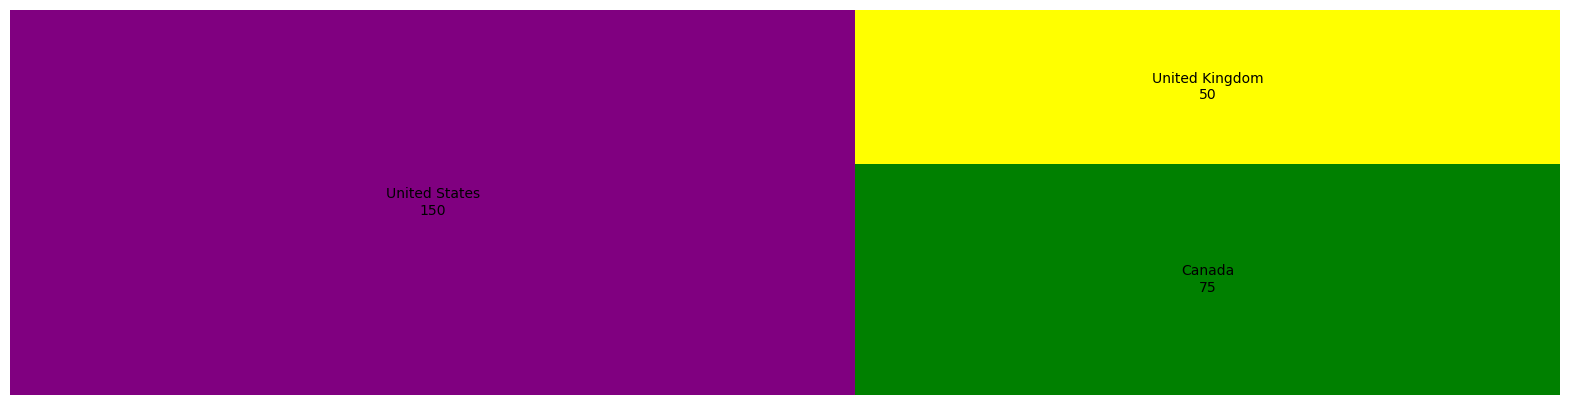

In [4]:
# Creo una nueva figura para el gráfico con un tamaño de 20x5 pulgadas
plt.figure(figsize=(20, 5))

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo un gráfico de treemap (diagrama de árbol) con el paquete 'squarify'
squarify.plot(

    # Defino los tamaños de los bloques del gráfico basados en el recuento de países en la columna 'country'
    sizes=df_users['country'].value_counts().values,
    
    # Creo las etiquetas para cada bloque con el nombre del país y su recuento
    label=[f"{country}\n{count}" for country, count in zip(
        df_users['country'].value_counts().index,  
        df_users['country'].value_counts().values 
    )],
    
    # Asigno los colores a los bloques según el país
    color=[country_colors.get(country, 'lightgrey') for country in df_users['country'].value_counts().index]
)

# Elimino los ejes del gráfico para una presentación más limpia
plt.axis("off")

# Muestro el gráfico en pantalla
plt.show()


Para el ejercicio 1.3 sobre la visualización de una variable categórica, elijo representar el número de usuarios por país.

Primero elijo un color para cada nación que repetiré en los gráficos posteriores para una mayor claridad visual.

Luego defino el tipo de gráfico, un diagrama de árbol, con squarify.plot, en el cual calculo el conteo de usuarios para definir el tamaño de los bloques y para mostrar en pantalla el número de usuarios por cada nación.

Finalmente, muestro el gráfico eliminando los ejes para una presentación más limpia.

Del gráfico se puede ver que hay 50 usuarios para el Reino Unido, 75 para Canadá y 150 para EE. UU.

A partir de estos datos, se podría investigar qué tipo de usuarios hay en cada nación para intentar llevar el número de clientes al nivel de EE. UU. también en los otros dos países. 

Por ejemplo, se podrían revisar las edades de los usuarios en cada nación, y si se descubriera que EE. UU. tiene un número tan elevado en comparación con los otros países porque tiene muchos más clientes jóvenes, se podrían organizar campañas de marketing dirigidas a un público con una edad baja específicas para el Reino Unido y Canadá. 

O también se podría observar según la fecha de registro o de la primera compra, cuando EE. UU. ha acumulado un margen tan alto, y si se descubriera, por ejemplo, que fue durante el período navideño, se podrían impulsar campañas más agresivas en esa época del año en los otros dos países.

1.4 Visualización de una variable categorica y una numérica

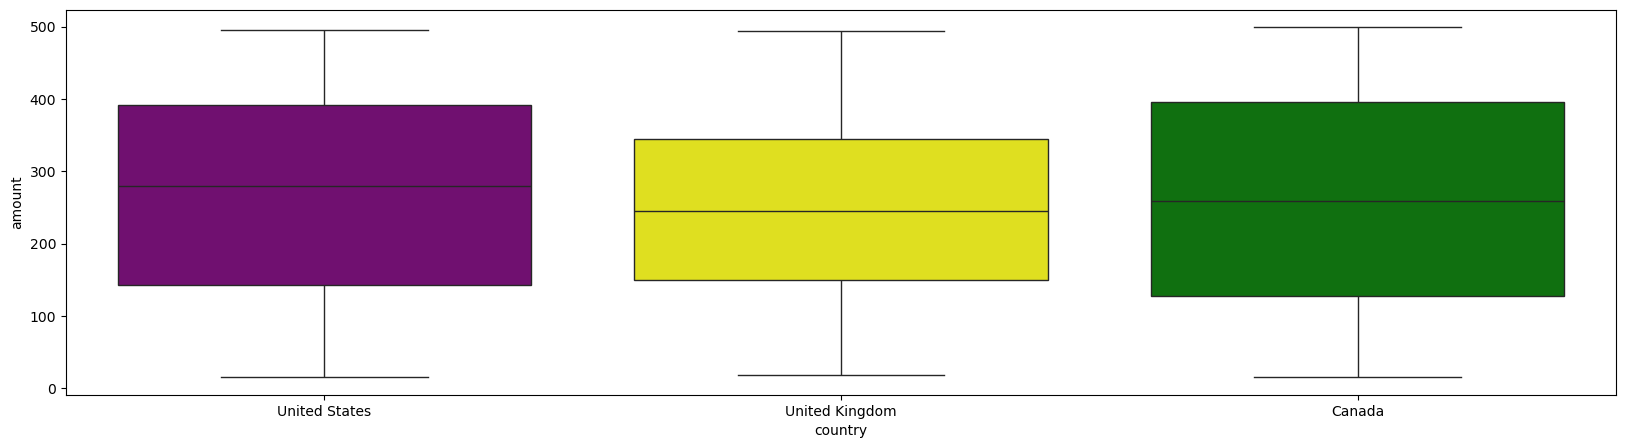

In [ ]:
# Filtro las transacciones aprobadas (declined == 0)
df_transactions_x_1_4 = df_transactions[df_transactions['declined'] == 0]

# Fusiono la tabla filtrada df_transactions_x_1_4 con la tabla df_users
df_merged_x_1_4 = pd.merge(df_users, df_transactions_x_1_4, left_on="id", right_on="user_id")

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo una figura para el gráfico con un tamaño específico
plt.figure(figsize=(20, 5))

# Creo un gráfico de caja (boxplot) usando Seaborn con colores personalizados
sns.boxplot(
    x='country', 
    y='amount', 
    data=df_merged_x_1_4, 
    hue='country',  # Asigno 'country' a 'hue'
    palette=country_colors,  # Utilizo la paleta personalizada
    legend=False  # Desactivo la leyenda para evitar el warning
)

# Muestro el gráfico
plt.show()


Para el ejercicio 1.4, para la visualización de una variable categórica y una numérica, elijo representar los montos de las transacciones divididos por los países de los clientes con boxplots.

Primero filtro solo las transacciones aprobadas donde declined=0.

Luego, unifico las tablas de transactions (filtrada) y users para tener a disposición los estados de los clientes con los datos de la transacción.

A continuación, elijo los colores para cada estado y creo el gráfico con boxplots.

Finalmente, visualizo el gráfico.

Del gráfico, la diferencia visual más evidente es el rango de los importes de los cuartiles de los boxplots, que resultan ser similares para EE. UU. y Canadá, mientras que para el Reino Unido los importes del 25% al 75% resultan ser más concentrados alrededor de la media.

Las medias son bastante similares, con EE. UU. teniendo una media ligeramente más alta.

Los bigotes de los boxplots se extienden de manera uniforme en los tres países.

Este gráfico podría ser tomado como los otros como base para una investigación más profunda, pero dado el resultado bastante uniforme, en mi opinión, no muestra señales evidentes sobre las cuales intervenir de inmediato.

1.5 Visualización de dos variables categoricas

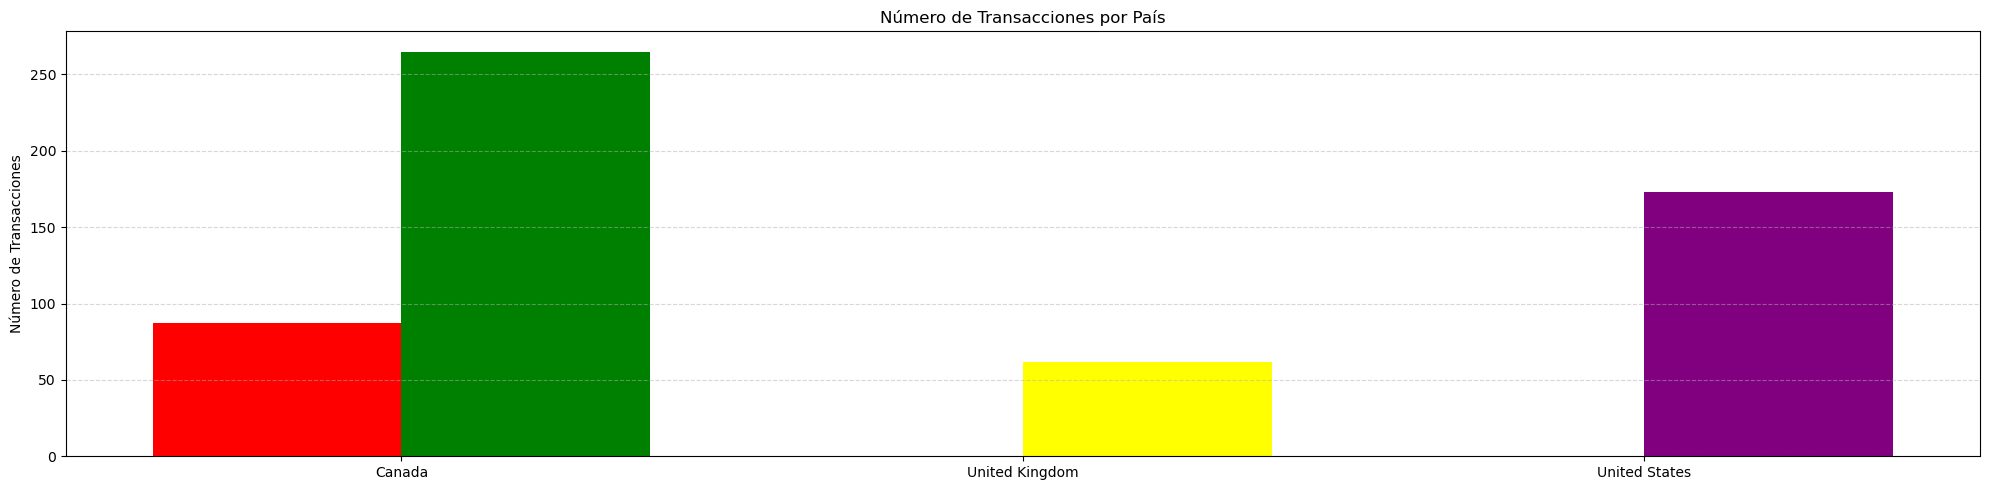

In [10]:
# Hago la union de la tabla de transacciones (df_transactions) con la tabla de usuarios (df_users) usando la columna 'user_id'
declined_by_country = (
    df_transactions.merge(df_users.rename(columns={'id': 'user_id'}), on='user_id')

    # Agrupo los datos por país ('country') para calcular el número de transacciones rechazadas y aceptadas
    .groupby('country', as_index=False)

    .agg(
        # Calculo el número de transacciones rechazadas contando cuántas tienen 'declined' igual a 1 y cuántas tienen 'declined' igual a 0
        num_declined=('declined', lambda x: (x == 1).sum()),  
        num_accepted=('declined', lambda x: (x == 0).sum())  

    )
)

# Creo el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 5))  

# Defino las posiciones en el eje X para las barras correspondientes a cada país y el ancho de cada barra
x = np.arange(len(declined_by_country['country']))  
bar_width = 0.4 

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo las barras para las transacciones rechazadas (color rojo)
ax.bar(
    
    # Modifico la posición para alinearlas a la izquierda
    x - bar_width / 2,  

    # Altura de las barras basada en el número de transacciones rechazadas
    declined_by_country['num_declined'],  

    # Ancho de las barras
    width=bar_width,  

    # Color rojo para las barras
    color='red'  
)

# Creo las barras para las transacciones aceptadas (con colores personalizados)
for i, country in enumerate(declined_by_country['country']):

    # Asigno el color de acuerdo al país
    color = country_colors.get(country, 'blue')

    ax.bar(
        # Modifico la posición para alinearlas a la derecha
        x[i] + bar_width / 2,  

        # Altura de las barras basada en el número de transacciones aceptadas
        declined_by_country['num_accepted'].iloc[i], 

        # Ancho de las barras
        width=bar_width,  

        # Color correspondiente al país
        color=color  
    )

# Configuro las etiquetas, el título del gráfico
ax.set_xticks(x)  
ax.set_xticklabels(declined_by_country['country'])  
ax.set_ylabel('Número de Transacciones')  
ax.set_title('Número de Transacciones por País')  
plt.grid(axis='y', linestyle='--', alpha=0.5)  

# Muestro el gráfico
plt.tight_layout()  
plt.show()


Para el ejercicio 1.5, para la visualización de dos variables categóricas, elijo representar las transacciones aprobadas y rechazadas divididas por país del cliente.

Primero, uno las tablas de transacciones y usuarios para tener disponible el país del cliente para cada transacción.

Luego agrupo por país del cliente y cuento el número de transacciones aceptadas y rechazadas.

Finalmente, configuro el gráfico de barras agrupadas con subplots, defino los colores de las barras y las etiquetas, y muestro el gráfico.

El gráfico muestra a primera vista dos cosas que, en mi opinión, requieren investigación: el hecho de que solo los clientes registrados en Canadá tienen transacciones rechazadas, y el hecho de que Canadá, a pesar de tener la mitad de los clientes de EE. UU., como se vio en el gráfico anterior, tiene casi el doble del número de transacciones que EE. UU.

El primer punto podría ser un resultado a mostrar al departamento encargado, para verificar que todos los métodos de pago de los clientes canadienses estén soportados y funcionando.

Para el segundo punto, la investigación debería ser más profunda: por ejemplo, se podría analizar qué y cuándo compraron los clientes canadienses en comparación con los de EE. UU., analizar posibles competidores que podrían estar captando mercado en EE. UU. pero no en Canadá, analizar los niveles de satisfacción de los diferentes países y ver si es coherente con el hecho de que los clientes canadienses tienden a comprar más veces en comparación con los otros dos países.

1.6 Visualización de tres variables 

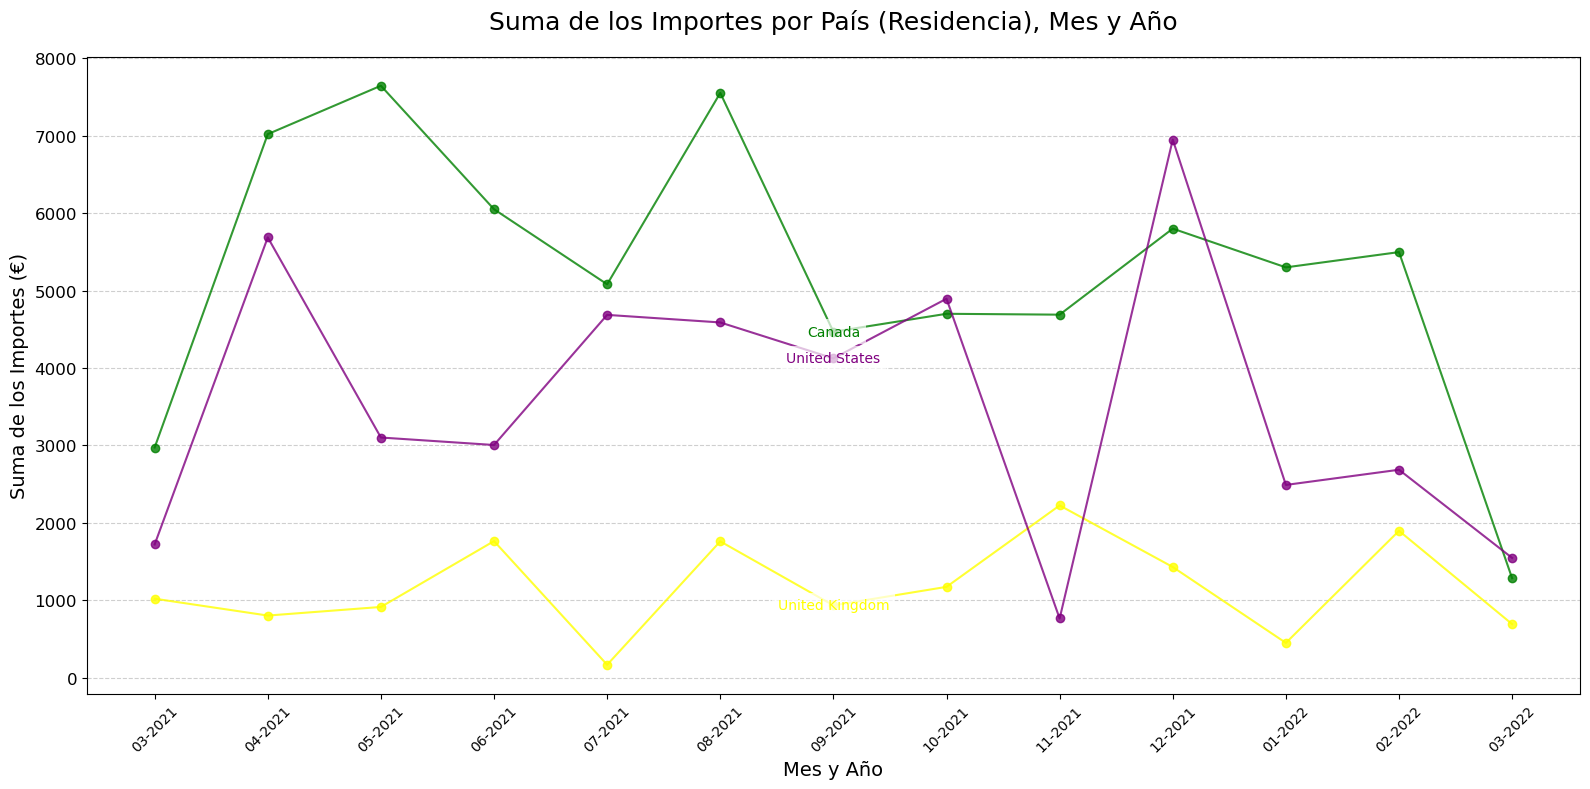

In [7]:
# Convierto la columna 'timestamp' a tipo datetime y creo las columnas 'year' y 'month'
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year
df_transactions['month'] = df_transactions['timestamp'].dt.month

# Filtro las transacciones aprobadas (declined == 0)
df_transactions_x_1_6 = df_transactions[df_transactions['declined'] == 0]

# Fusiono la tabla filtrada df_transactions_x_1_6 con la tabla df_users
df_merged_x_1_6 = pd.merge(df_users, df_transactions_x_1_6, left_on="id", right_on="user_id")

# Calculo la suma de los montos por país (residencia), año y mes
df_grouped = df_merged_x_1_6.groupby(['country', 'year', 'month'])['amount'].sum().reset_index()

# Creo una nueva columna combinada "year_month" con mes y año en el formato "mes-año"
df_grouped['year_month'] = df_grouped['month'].astype(str).str.zfill(2) + '-' + df_grouped['year'].astype(str)

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo el gráfico de líneas
plt.figure(figsize=(16, 8))

# Itero sobre cada país en el DataFrame
for country in df_grouped['country'].unique():
    country_data = df_grouped[df_grouped['country'] == country]
    
    # Obtengo el color del país del diccionario, si no existe, usa el azul por defecto
    color = country_colors.get(country, 'blue')

    line, = plt.plot(
        # Mes y año en el eje X
        country_data['year_month'],  

        # Suma de los importes en el eje Y
        country_data['amount'],  

        # Añadir puntos sobre las líneas
        marker='o',  

        # Etiqueta del país
        label=country,  

        # Color de la linea
        color=color,  

        # Trasparencia
        alpha=0.8
    )
    
    # Determino una posición estratégica: inicio, fin o punto medio
    num_points = len(country_data)
    random_idx = num_points // 2  # Posición central

    x_pos = country_data['year_month'].iloc[random_idx]
    y_pos = country_data['amount'].iloc[random_idx]
    
    # Posiciono el nombre del país sobre la línea con el color correspondiente
    plt.text(
        # Posición en el eje X
        x_pos,  

        # Posición en el eje Y
        y_pos,  

        # Nombre del país
        country,  

        # Tamaño de la fuente
        fontsize=10,
        
        # Mismo color que la línea
        color=line.get_color(),

        # Alineación horizontal
        ha='right' if random_idx == 0 else ('left' if random_idx == -1 else 'center'),

        # Alineación vertical
        va='center',  

        # Fondo para mejorar la legibilidad
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  
    )

# Personalizo del gráfico
plt.title('Suma de los Importes por País (Residencia), Mes y Año', fontsize=18, pad=20)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Suma de los Importes (€)', fontsize=14)

# Modifico el formato de los ticks para mostrar primero el mes y luego el año
plt.xticks(
    df_grouped['year_month'].unique(),
    fontsize=10, 
    rotation=45
)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mejoro el layout
plt.tight_layout()
plt.show()


Para el ejercicio 1.6, para la visualización de tres variables, elijo mostrar la variación en el tiempo de la suma de las transacciones aprobadas para los tres países de los clientes.

Primero convierto los valores de la columna timestamp al tipo de dato fecha y creo las columnas para los meses y los años.

Luego filtro solo las transacciones aprobadas y uno las tablas de transactions y users para tener disponible la nación del cliente para cada transacción.

A continuación, creo la columna para el mes y el año y defino los colores para los países.

Finalmente, configuro el gráfico con plot, las líneas, los nombres de los países, el título y los nombres de los meses y los años, y lo muestro.

Desde el gráfico, a primera vista, se observa un dato coherente con el último gráfico del ejercicio 1.5, pero no con el gráfico del ejercicio 1.4: es decir, que los clientes de Canadá son los más rentables, habiendo realizado también más transacciones, a pesar de ser la mayoría de los clientes de EE. UU.

Sin tener en cuenta los dos meses de marzo de 2021 y 2022, que podrían no estar completos, las líneas del gráfico son bastante uniformes.

Sin embargo, hay momentos que considero dignos de investigación, como por ejemplo, noviembre y diciembre son meses extraños en comparación con los clientes de EE. UU., que registran primero el peor resultado para ellos y para los 3 países, y luego el mejor para ellos y para los 3 países.

Para el resto de los meses, la tendencia es prácticamente invariable, con Canadá casi constantemente con la suma de los importes más alta y el Reino Unido con la más baja.

El espacio para investigaciones profundas a partir de este gráfico es muy alto; muchos de los meses visualizados resaltan peculiaridades interesantes, como por ejemplo, noviembre es tanto el mes récord para el Reino Unido como al mismo tiempo el resultado peor para EE. UU.

1.7 Pairplot

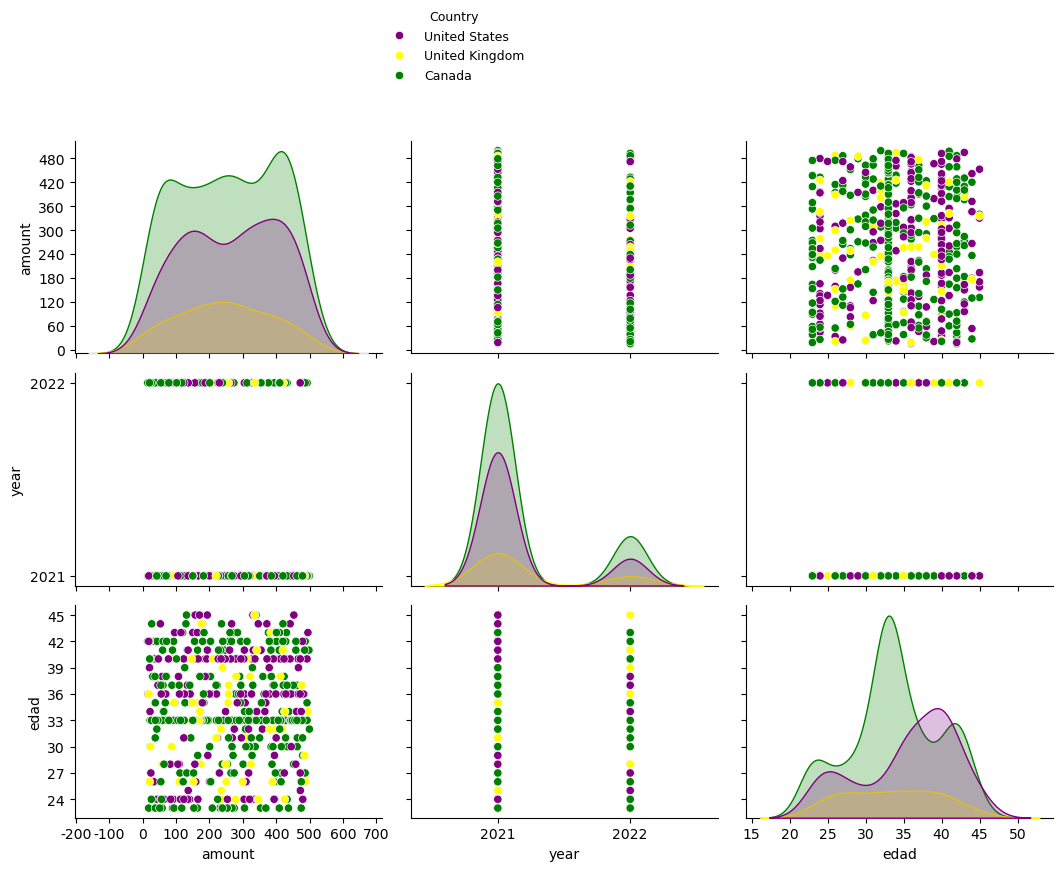

In [9]:
# Filtro las transacciones aprobadas (donde 'declined' es igual a 0)
df_transactions_approved = df_transactions[df_transactions['declined'] == 0]

# Uno los DataFrames 'df_transactions_approved' y 'df_users' usando 'user_id' en df_transactions e 'id' en df_users
df_merged = pd.merge(df_transactions_approved, df_users, left_on='user_id', right_on='id', how='left')

# Selecciono solo las columnas necesarias para el pairplot, incluyendo 'age'
df_pairplot = df_merged[['amount', 'year', 'country', 'edad']]

# Defino los colores para cada país
country_colors = {
    'Canada': 'green',
    'United States': 'purple',
    'United Kingdom': 'yellow'
}

# Creo el pairplot sin la leyenda automática y aplico la paleta de colores
g = sns.pairplot(df_pairplot, hue='country', markers='o', palette=country_colors)

# Elimino la leyenda automática
g._legend.remove()

# Agrego la leyenda encima del gráfico
g.add_legend(title='Country')
g._legend.set_bbox_to_anchor((0.5, 1.1))  # Posiciono la leyenda arriba
g._legend.set_frame_on(False)

# Modifico el tamaño del título de la leyenda y de los textos
g._legend.get_title().set_fontsize(9)
for text in g._legend.get_texts():
    text.set_fontsize(9)

# Formateo el eje X para mostrar solo los años enteros
for ax in g.axes.flatten():
    
    # Modifico el eje X para mostrar solo el año (sin valores decimales)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Muestra solo los años enteros
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Formato para evitar valores decimales

    # Formateo el eje Y para mostrar solo números enteros
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Muestra solo números enteros en el eje Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}'))  # Formato para evitar valores decimales

plt.tight_layout()
plt.show()


Para el pairplot del ejercicio 1.7 elijo utilizar las variables de los importes, de la edad y de los años.

Primero filtro las transacciones aprobadas donde declined=0.

Luego uno la tabla de transacciones aprobadas con la tabla users.

Después creo la tabla df_pairplot con las columnas que me interesan para el gráfico.

Defino los colores como en los otros gráficos.

Creo el gráfico con pairplot.

Finalmente, elimino la leyenda automática y agrego una debajo del título para que no se sobreponga con los gráficos, y modifico las características del gráfico para una mejor lectura.

De los gráficos no se obtienen resultados fácilmente interpretables, pero cada intersección señala relaciones que se pueden analizar: 
- amount - amount: resalta el hecho de que Canadá sea el país más remunerativo. 
- amount - year: demuestra la uniformidad de los importes en los dos años. 
- amount - edad: se nota que hay edades como entre los 30 y 35 para Canadá y entre los 35 y 40 para EE. UU. que tienen transacciones para todos los importes. 
- year - year: resalta que Canadá tiene más transacciones tanto en 2021 como en 2022. 
- year - edad: este gráfico parece tener los puntos demasiado superpuestos para ser interpretado. 
- edad - edad: muestra cómo para Canadá hay más clientes con edades entre 30 y 35 años, mientras que para EE. UU. la edad más común es entre 35 y 40 años.